In [1]:
### PROBLEM 1

In [2]:
### PART 1

def function(a):
    '''This is a function with a docstring'''
    return a + 2

help(function)

Help on function function in module __main__:

function(a)
    This is a function with a docstring



In [3]:
### PART 2

%pdb on

def div(x, y):
    return x/y

def bug(a, b):
    return div(a, b)

bug(3, 0)

Automatic pdb calling has been turned ON


ZeroDivisionError: division by zero

> <ipython-input-3-c40bb996fca2>(6)div()
      4 
      5 def div(x, y):
----> 6     return x/y
      7 
      8 def bug(a, b):

ipdb> u
> <ipython-input-3-c40bb996fca2>(9)bug()
      7 
      8 def bug(a, b):
----> 9     return div(a, b)
     10 
     11 bug(3, 0)

ipdb> a
a = 3
b = 0
ipdb> q


In [5]:
### PROBLEM 2

In [6]:
%%latex
The function is 

\begin{equation}
f(\kappa) = \frac{r_0\sigma^2}{\kappa}\left(\exp\left(-\kappa t\right) - \exp\left(-2\kappa t\right)\right)
\end{equation}

As $f$ is a univariate function, we can calculate the condition number quite simply as:

\begin{equation}
k\left(f\right) = \left|\frac{\kappa f'\left(\kappa\right)}{f\left(\kappa\right)}\right|
\end{equation}

Using the quotient rule, we can find $f'\left(\kappa\right)$


\begin{equation}
f'\left(\kappa\right) = \frac{r_0\sigma^2\left(2\kappa t\exp\left(-2\kappa t\right) + \exp\left(-2\kappa t\right) - \kappa t\exp\left(-\kappa t\right) - \exp\left(-\kappa t\right)\right)}{\kappa^2}
\end{equation}

Substituting this into the condition function, we end up with

\begin{equation}
k\left(f\right) = \frac{2\kappa t\exp\left(-2\kappa t\right) + \exp\left(-2\kappa t\right) - \kappa t\exp\left(-\kappa t\right) - \exp\left(-\kappa t\right)}{\exp\left(-\kappa t\right) - \exp\left(-2\kappa t\right)}
\end{equation}

This can also be represented as


\begin{equation}
k\left(f\right) = \kappa t\frac{2\exp\left(-2\kappa t\right) - \exp\left(-\kappa t\right)}{\exp\left(-\kappa t\right) - \exp\left(-2\kappa t\right)} - 1
\end{equation}

When $\kappa = 0$, this simplifies to $\frac{0}{0}$. Thus, the function is unstable when $\kappa = 0$

<IPython.core.display.Latex object>

In [7]:
%%latex
We know that, for a given exponential equation $\exp\left(kx\right)$, the Maclaurin series expansion is

\begin{equation}
\sum_{n=0}^\infty \frac{k^nx^n}{n!}
\end{equation}

Thus, in our case, where we have an exponential expression of the form 
$\exp\left(-kx\right) - \exp\left(-2kx\right)$ can also be expressed as

\begin{equation}
\sum_{n=0}^\infty \frac{\left(-1\right)^nk^nx^n}{n!} - \frac{\left(-1\right)^n2^nk^nx^n}{n!}
\end{equation}

Which can be further simplified to

\begin{equation}
\sum_{n=0}^\infty \frac{\left(-1\right)^n\left(1 - 2^n\right)k^nx^n}{n!}
\end{equation}

$f$ can therefore be represented as 

\begin{equation}
f\left(\kappa\right) = \frac{r_0\sigma^2}{\kappa}\sum_{n=0}^\infty \frac{\left(-1\right)^n\left(1 - 2^n\right)t^n\kappa^n}{n!}
\end{equation}

However, this means we'll still be doing subtraction of extremely small numbers, so this approach won't work.
Thus, we're simply going to have to approximate using a slightly less rigorous method. Let's consider curve fitting

<IPython.core.display.Latex object>

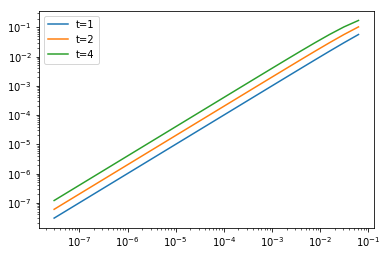

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_subtraction(kappa, t):
    return np.exp(np.float32(-1) * kappa * t) - np.exp(np.float32(-2) * kappa * t)


x = np.array([np.float32(0.5**i) for i in range(4, 26)])
y1 = np.array([exponential_subtraction(k, 1) for k in x])
y2 = np.array([exponential_subtraction(k, 2) for k in x])
y4 = np.array([exponential_subtraction(k, 4) for k in x])

plt.plot(x, y1, label='t=1')
plt.plot(x, y2, label='t=2')
plt.plot(x, y4, label='t=4')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.figure()

In [10]:
%%latex

As seen in the above section, when plotted on a log-log scale, the exponential subtraction (the ill-posed part of the problem) 
comes out as a straight line. This implies we should be able to fit it to a function quite easily.

<IPython.core.display.Latex object>

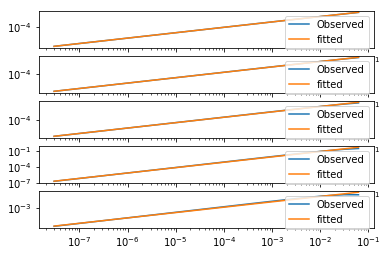

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential_subtraction(kappa, t):
    return np.exp(-1 * kappa * t) - np.exp(-2 * kappa * t)


def fitness(k, a, b):
    return b + k*a


def create_fn(t):
    x = np.array([0.5**i for i in range(4, 30)])
    y = np.array([exponential_subtraction(k, t) for k in x])
    (a, b), _ = curve_fit(fitness, np.log10(x), np.log10(y))
    return lambda k: np.power(np.float64(10), b) * np.power(k, a)


for i in range(5):
    plt.subplot(5, 1, i+1)
    t = 2**i
    f = create_fn(t)

    y = np.array([exponential_subtraction(k, t) for k in x])
    
    y_fitted = np.array([f(k) for k in x])
    plt.plot(x, y, label='Observed')
    plt.plot(x, y_fitted, label='fitted')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()


In [12]:
%%latex
Now, we know that we lose $\log_{2} k\left(f\right)$ bits of precision. Thus, a problem with a condition 
number of 256 will lose 8 bits of precision. Doubles are, by nature, more precise than floats, so we can
lose more bits there before seeing the same effects -- the double has a significant 33 bits longer than
does a float.

What this means is that the condition number of the double formation of the problem can be significantly
higher than the condition number of the float. But first, let's plot the condition number.

<IPython.core.display.Latex object>

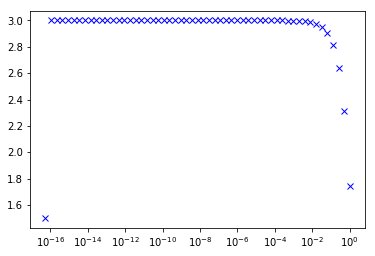

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential_subtraction(kappa, t):
    if isinstance(kappa, np.float32):
        return np.exp(np.float32(-1) * kappa * t) - np.exp(np.float32(-2) * kappa * t)
    else:
        return np.exp(np.float64(-1) * kappa * t) - np.exp(np.float64(-2) * kappa * t)


def find_condition_number(kappa, t):
    f1 = kappa*t/exponential_subtraction(kappa, t)

    if isinstance(f1, np.float32):
        f2 = np.float32(2)*np.exp(np.float32(-2) * kappa * t) + np.exp(np.float32(-1) * kappa * t) - exponential_subtraction(kappa, t)
    else:
        f2 = np.float32(2)*np.exp(np.float64(-2) * kappa * t) + np.exp(np.float64(-1) * kappa * t) - exponential_subtraction(kappa, t)

    return np.abs(f1*f2)



x = np.array([np.power(np.float64(.5), np.float64(i)) for i in range(55)])
y = np.array([find_condition_number(k, np.float64(1)) for k in x])

plt.plot(x, y, 'bx')
plt.xscale('log')

In [14]:
%%latex
Oddly, this graph shows an asymptote of 3 for our condition number. Either the condition number calculation itself
is ill-posed, or else I have misjudged the cancellation from earlier, and the problem is in fact well-posed. However,
because I do not actually know which it is, I will simply provide the ability to create functions that switch over at
any given threshold, thus allowing user configuration.

<IPython.core.display.Latex object>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential_subtraction(kappa, t):
    if isinstance(kappa, np.float32):
        return np.exp(np.float32(-1) * kappa * t) - np.exp(np.float32(-2) * kappa * t)
    else:
        return np.exp(np.float64(-1) * kappa * t) - np.exp(np.float64(-2) * kappa * t)


def fitness(k, a, b):
    return b + k*a


def create_fn(t):
    x = np.array([0.5**i for i in range(4, 30)])
    y = np.array([exponential_subtraction(k, t) for k in x])
    (a, b), _ = curve_fit(fitness, np.log10(x), np.log10(y))
    return lambda k: np.power(np.float64(10), b) * np.power(k, a)


def create_term_function(threshold):

    def fn(kappa, t, sigma, r_0):
        if kappa*t > threshold:
            return r_0*np.power(sigma, type(sigma)(2))*exponential_subtraction(kappa, t)/kappa
        else:
            exp_factor = create_fn(t)(k)
            return r_0*np.power(sigma, type(sigma)(2))*exp_factor/kappa

    return fn

In [16]:
### PROBLEM 3

8.73 µs ± 467 ns per loop (mean ± std. dev. of 7 runs, 3000 loops each)
23.6 µs ± 3.45 µs per loop (mean ± std. dev. of 7 runs, 3000 loops each)
44.5 µs ± 2.43 µs per loop (mean ± std. dev. of 7 runs, 3000 loops each)
76.1 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 3000 loops each)
96.3 µs ± 2 µs per loop (mean ± std. dev. of 7 runs, 3000 loops each)
141 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 3000 loops each)
177 µs ± 5.05 µs per loop (mean ± std. dev. of 7 runs, 3000 loops each)
224 µs ± 2.12 µs per loop (mean ± std. dev. of 7 runs, 3000 loops each)
296 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 3000 loops each)
346 µs ± 7.34 µs per loop (mean ± std. dev. of 7 runs, 3000 loops each)


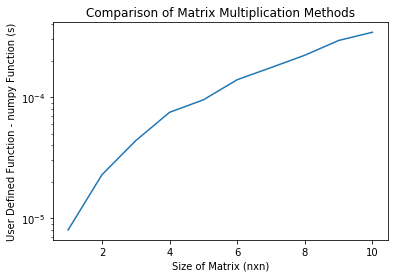

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import operator

A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = A+1
D = np.array([[1], [2], [3]])

def matrix_multiplier(A, B):
    A_rows = len(A)
    B_rows = len(B)
    B = B.transpose()
    B_cols = len(B)
    output = np.array([np.zeros(B_cols) for _ in range(A_rows)])

    for i, A_i in enumerate(A):
        for j, B_j in enumerate(B):
            if len(A_i) != len(B_j):
                raise ValueError("Matrices do not conform!")
            output[i][j] = (A_i*B_j).sum()

    return output

    
matrix_multiplier(A, B)

dot_results = []
fn_results = []

for x in range(1, 11):
    A = np.array([np.zeros(x) for _ in range(x)])

    for i in range(x):
        for j in range(x):
            A[i][j] = i*x + j + 1

    B = A+1
    dot_val = %timeit -o -q -n 3000 A.dot(B)
    dot_results.append(dot_val.average)

    fn_val = %timeit -o -n 3000 matrix_multiplier(A, B)
    fn_results.append(fn_val.average)

dot_results = np.array(dot_results)
fn_results = np.array(fn_results)
diff = fn_results - dot_results
x = np.array(range(1, 11))
plt.yscale('log')
plt.title('Comparison of Matrix Multiplication Methods')
plt.xlabel('Size of Matrix (nxn)')
plt.ylabel('User Defined Function - numpy Function (s)')
plt.plot(x, diff)
plt.figure()

In [18]:
### PROBLEM 4

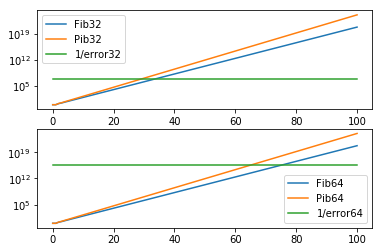

In [20]:
### PART A

import matplotlib.pyplot as plt
import numpy as np


def create_values(n, c, t):
    c = t(c)
    if n == 0:
        return np.array([t(1)])
    
    base = np.array([t(1), t(1)])

    for i in range(n-1):
        new = base[i] + c*base[i+1]
        base = np.append(base, new)

    return base

N = 100
fib_float = create_values(N, 1, np.float32)
pib_float = create_values(N, np.float32(1+np.sqrt(np.float32(3)/np.float32(100))), np.float32)
fib_double = create_values(N, 1, np.float64)
pib_double = create_values(N, np.float64(1+np.sqrt(np.float64(3)/np.float64(100))), np.float64)

x = np.array(range(0, N+1))
plt.subplot(211)
plt.yscale('log')
plt.plot(x, fib_float, label='Fib32')
plt.plot(x, pib_float, label='Pib32')
plt.plot(x, np.array([1/np.finfo(np.float32).eps for _ in range(N+1)]), label='1/error32')
plt.legend()
plt.subplot(212)
plt.yscale('log')
plt.plot(x, fib_double, label='Fib64')
plt.plot(x, pib_double, label='Pib64')
plt.plot(x, np.array([1/np.finfo(np.float64).eps for _ in range(N+1)]), label='1/error64')
plt.legend()
plt.show()

No accuracy on float32 starting from n=46
No accuracy on float64 starting from n=85


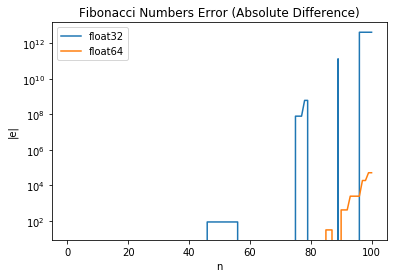

In [21]:
### PART B

import matplotlib.pyplot as plt
import numpy as np


def create_values(n, t):
    if n == 0:
        return np.array([t(1)])
    
    base = np.array([t(1), t(1)])

    for i in range(n-1):
        new = base[i] + base[i+1]
        base = np.append(base, new)

    return base

def find_starting_value(n, t):
    base = create_values(n, t)
    n -= 1
    f = base[-1]
    while n > 0:
        n -= 1
        f -= base[n]
    return f - t(1)

find_starting_value(4, np.float32)

x = np.array(range(101))
f = np.array([find_starting_value(i, np.float32) for i in range(101)])
d = np.array([find_starting_value(i, np.float64) for i in range(101)])

plt.title("Fibonacci Numbers Error (Absolute Difference)")
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('|e|')
plt.plot(x, f, label='float32')
plt.plot(x, d, label='float64')
plt.legend()

for arr, t in [(f, 'float32'), (d, 'float64')]:
    for i, elem in enumerate(arr):
        if elem >= 1:
            print("No accuracy on %s starting from n=%d" % (t, i))
            break

No accuracy on float32 starting from n=11
No accuracy on float64 starting from n=11


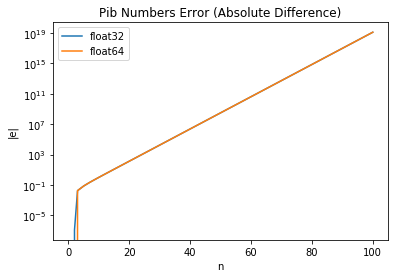

In [22]:
### PART C

import matplotlib.pyplot as plt
import numpy as np


def create_values(n, c, t):
    if n == 0:
        return np.array([t(1)])
    
    base = np.array([t(1), t(1)])

    for i in range(n-1):
        new = base[i] + base[i+1]*c
        base = np.append(base, new)

    return base

def find_starting_value(n, c, t):
    c = t(c)
    base = create_values(n, c, t)
    n -= 1
    f = base[-1]
    while n > 0:
        n -= 1
        f -= (base[n]*c)
    return f - t(1)

c = 1 + np.sqrt(3)/100
x = np.array(range(101))
f = np.array([find_starting_value(i, c, np.float32) for i in range(101)])
d = np.array([find_starting_value(i, c, np.float64) for i in range(101)])
plt.title("Pib Numbers Error (Absolute Difference)")
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('|e|')
plt.plot(x, f, label='float32')
plt.plot(x, d, label='float64')
plt.legend()

for arr, t in [(f, 'float32'), (d, 'float64')]:
    for i, elem in enumerate(arr):
        if elem >= 1:
            print("No accuracy on %s starting from n=%d" % (t, i))
            break

In [24]:
%%latex
Part C Continued.


As seen from parts B and C, the Fibonacci numbers lose no accuracy for a protracted period of time 
(longer for double precision than single precision) and then lose pretty much all accuracy all at once. 
On the other hand, the pib numbers lose accuracy almost immediately, but at a much more gradual and steady rate.


We would expect the pib behavior to be more typical. Although we are using floating point types in the Fibonacci
sequence, all of the numbers are floating point representations of integers. This is an uncommon occurrence in 
scientific computing -- if all values can be expected to be integers, we would use an integer type and get rid 
of all imprecision. The pib numbers are more typical in that they include actual non-integer values. Error 
propagation is thus more likely to follow that pattern.

<IPython.core.display.Latex object>